# 8. LangGraph로 만드는 AI 에이전트
## 대화형 그래프 실행

In [1]:
!pip install langchain==0.3.0 langchain-openai==0.2.0 langgraph==0.2.22

  Using cached langchain-0.3.0-py3-none-any.whl.metadata (7.1 kB)
Using cached langchain-0.3.0-py3-none-any.whl (1.0 MB)
   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ---------------------------------------- 98.5/98.5 kB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/311.8 kB ? eta -:--:--
   --------------------------------------- 311.8/311.8 kB 18.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.3 kB ? eta -:--:--
   ---------------------------------------- 75.3/75.3 kB ? eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.30
    Uninstalling langsmith-0.3.30:
      Successfully uninstalled langsmith-0.3.30
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.23
    Uninstalling langchain-0.3.23:
      Successfully uninstalled langchain-0.3.23


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
embedchain 0.1.116 requires langchain-community<0.3.0,>=0.2.6, but you have langchain-community 0.3.0 which is incompatible.
embedchain 0.1.116 requires langchain-openai<0.2.0,>=0.1.7, but you have langchain-openai 0.2.0 which is incompatible.
langchain-experimental 0.0.63 requires langchain-community<0.3.0,>=0.2.6, but you have langchain-community 0.3.0 which is incompatible.
langchain-experimental 0.0.63 requires langchain-core<0.3.0,>=0.2.10, but you have langchain-core 0.3.51 which is incompatible.
langserve 0.2.2 requires langchain-core<0.3,>=0.1, but you have langchain-core 0.3.51 which is incompatible.
ragchain 0.2.6 requires pydantic==1.10.13, but you have pydantic 2.11.3 which is incompatible.
ragchain 0.2.6 requires python-dotenv==1.0.0, but you have python-dotenv 1.0.1 which is incompatible.

[notice] A

In [2]:
pip install langgraph

     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     ---------------------------------------- 44.4/44.4 kB ? eta 0:00:00
   ---------------------------------------- 0.0/145.0 kB ? eta -:--:--
   ---------------------------------------- 145.0/145.0 kB 9.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
   ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/433.6 kB ? eta -:--:--
   --------------------------------------- 433.6/433.6 kB 13.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/47.2 kB ? eta -:--:--
   ---------------------------------------- 47.2/47.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/358.3 kB ? eta -:--:--
   ----------------------------------- ---- 317.4/358.3 kB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 358.3/358.3 kB 7.4 MB/s eta 0:00:00
   ------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.2.5 requires langchain-core<0.3.0,>=0.2.7, but you have langchain-core 0.3.52 which is incompatible.
langchain 0.2.5 requires langsmith<0.2.0,>=0.1.17, but you have langsmith 0.3.31 which is incompatible.
langchain-community 0.2.5 requires langchain-core<0.3.0,>=0.2.7, but you have langchain-core 0.3.52 which is incompatible.
langchain-community 0.2.5 requires langsmith<0.2.0,>=0.1.0, but you have langsmith 0.3.31 which is incompatible.
langchain-openai 0.1.8 requires langchain-core<0.3,>=0.2.2, but you have langchain-core 0.3.52 which is incompatible.
langchain-text-splitters 0.2.1 requires langchain-core<0.3.0,>=0.2.0, but you have langchain-core 0.3.52 which is incompatible.


In [4]:
pip install python-dotenv langchain_openai

  Using cached langchain_core-0.2.43-py3-none-any.whl.metadata (6.2 kB)
  Using cached langsmith-0.1.147-py3-none-any.whl.metadata (14 kB)
Using cached langchain_core-0.2.43-py3-none-any.whl (397 kB)
Using cached langsmith-0.1.147-py3-none-any.whl (311 kB)
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.31
    Uninstalling langsmith-0.3.31:
      Successfully uninstalled langsmith-0.3.31
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.52
    Uninstalling langchain-core-0.3.52:
      Successfully uninstalled langchain-core-0.3.52
Note: you may need to restart the kernel to use updated packages.


In [1]:
from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI

# .env 파일에서 환경 변수 로드
load_dotenv()

# GPT-4o-mini 설정
gpt4o_mini = ChatOpenAI(
    model_name="gpt-4o-mini",  # GPT-4o-mini에 해당하는 모델명
    temperature=0.7,
    max_tokens=150,
)

# GPT-4o 설정
gpt4o = ChatOpenAI(
    model_name="gpt-4o",  # GPT-4o에 해당하는 모델명
    temperature=0.7,
    max_tokens=300,
)

C:\Users\chltn\AppData\Local\Temp\ipykernel_24612\2434043449.py:8: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  gpt4o_mini = ChatOpenAI(


In [2]:
from langchain.schema import HumanMessage

# GPT-4o-mini 사용
response_mini = gpt4o_mini.invoke([HumanMessage(content="Hello, how are you?")])
print(response_mini.content)

# GPT-4o 사용
response_full = gpt4o.invoke([HumanMessage(content="Explain the concept of machine learning.")])
print(response_full.content)

Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?
Machine learning is a subset of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to perform tasks without being explicitly programmed to do so. Instead of relying on hard-coded rules, machine learning systems learn from data to make predictions or decisions. Here are some key aspects of the concept:

1. **Data-Driven**: Machine learning models are trained on large datasets. The quality and quantity of this data significantly impact the model's performance. The more relevant data the model is exposed to, the better it can learn patterns and make accurate predictions.

2. **Algorithms**: Machine learning uses various algorithms to identify patterns or structures in data. These algorithms can be categorized into different types:
   - **Supervised Learning**: The model is trained on a labeled dataset, mea

## Langgraph 를 이용한 챗봇 만들기

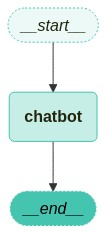

챗봇과 대화를 시작합니다. 종료하려면 'exit'를 입력하세요.
Bot: Bot: Hello! How can I assist you today?
Hello! How can I assist you today?
Bot: Bot: Hello! How can I assist you today?
Hello! How can I assist you today?
Bot: Bot: 안녕하세요! 어떻게 도와드릴까요?
안녕하세요! 어떻게 도와드릴까요?
Bot: Bot: LangGraph는 자연어 처리(NLP)와 관련된 그래프 기반의 모델이나 프레임워크를 지칭하는 용어일 수 있습니다. 그러나 "LangGraph"라는 특정한 이름의 프로젝트나 기술에 대한 정보는 제가 알고 있는 데이터에는 포함되어 있지 않습니다. 

일반적으로, 자연어 처리 분야에서 그래프 기반 접근 방식은 단어, 문장, 또는 문서 간의 관계를 시각화하고 분석하는 데 사용됩니다. 이러한 그래프는 의미론적 관계, 구문 구조, 또는 문맥적 관계를 나타낼 수 있습니다. 

만약 LangGraph가 특정한 프로젝트나 연구를 의미한다면, 그에 대한 구체적인 정보나 문맥을 제공해 주시면 더 자세한 설명을 드릴 수 있을 것입니다.
LangGraph는 자연어 처리(NLP)와 관련된 그래프 기반의 모델이나 프레임워크를 지칭하는 용어일 수 있습니다. 그러나 "LangGraph"라는 특정한 이름의 프로젝트나 기술에 대한 정보는 제가 알고 있는 데이터에는 포함되어 있지 않습니다. 

일반적으로, 자연어 처리 분야에서 그래프 기반 접근 방식은 단어, 문장, 또는 문서 간의 관계를 시각화하고 분석하는 데 사용됩니다. 이러한 그래프는 의미론적 관계, 구문 구조, 또는 문맥적 관계를 나타낼 수 있습니다. 

만약 LangGraph가 특정한 프로젝트나 연구를 의미한다면, 그에 대한 구체적인 정보나 문맥을 제공해 주시면 더 자세한 설명을 드릴 수 있을 것입니다.


In [ ]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_teddynote.graphs import visualize_graph


###### STEP 1. 상태(State) 정의 ######
class State(TypedDict):
    # 메시지 정의(list type 이며 add_messages 함수를 사용하여 메시지를 추가)
    messages: Annotated[list, add_messages]


###### STEP 2. 노드(Node) 정의 ######
# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm.invoke(state["messages"])]}


###### STEP 3. 그래프(Graph) 정의, 노드 추가 ######
# 그래프 생성
graph_builder = StateGraph(State)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("chatbot", chatbot)

###### STEP 4. 그래프 엣지(Edge) 추가 ######
# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")

# 그래프에 엣지 추가
graph_builder.add_edge("chatbot", END)

###### STEP 5. 그래프 컴파일(compile) ######
# 그래프 컴파일
graph = graph_builder.compile()

###### STEP 6. 그래프 시각화 ######
# 그래프 시각화
visualize_graph(graph)

###### STEP 7. 대화형 그래프 실행 ######
print("챗봇과 대화를 시작합니다. 종료하려면 'exit'를 입력하세요.")

while True:
    # 사용자 입력 받기
    question = input("You: ")
    if question.lower() == "exit":
        print("대화를 종료합니다.")
        break

    # 그래프 이벤트 스트리밍
    print("Bot:", end=" ")
    for event in graph.stream({"messages": [("user", question)]}):
        for value in event.values():
            print(value["messages"][-1].content, end="")
    print()  # 줄바꿈
